### Pruebas ola v2

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio
from utils.wav_utils import read_wav, save_wav 

import ola 
from pytsmod import olatsm
from test import plotting 


Observacion:
tamaño de ventana en segundos: w_size = N/fs

Para fs = 44100

algunos casos:
Si N = 441 -> w_size = 10 ms

Si N = 882 -> w_size = 20 ms

Si N = 1024 -> w_size = 23 ms

Si N = 2048 -> w_size = 46 ms

Si N = 4096 -> w_size = 92 ms

Si N = 8192 -> w_size = 184 ms

#### ALGUNAS PRUEBAS INICIALES SUBJETIVAS. 

Comparando audios reales (.wav) modificados con la libreria de referencia
pytsmod y con la nuestra.

#### CASO 1:

Audio: 'piano_cerca.wav' mono, 48k, 5 seg (armonico)

Probamos variando el alpha, el N de la ventana y manteniendo un Hs=N//2

In [141]:
#lectura de audio
fs = 48000
piano_cerca, _ = read_wav('audios/piano_cerca.wav', fs)

#pytsmod version
pianocerca_refe= olatsm.ola(piano_cerca, .5, win_type='hann', win_size=512, syn_hop_size=512//2)

#nuestra version
pianocerca_ours = ola.TSM_OLA(piano_cerca, 512, .5, 512//2)

In [142]:
#Escucho señal modificada by pystmod
Audio(pianocerca_refe, rate=48000)


In [143]:
#Escucho señal modificada por nuestro code
Audio(pianocerca_ours, rate=48000)

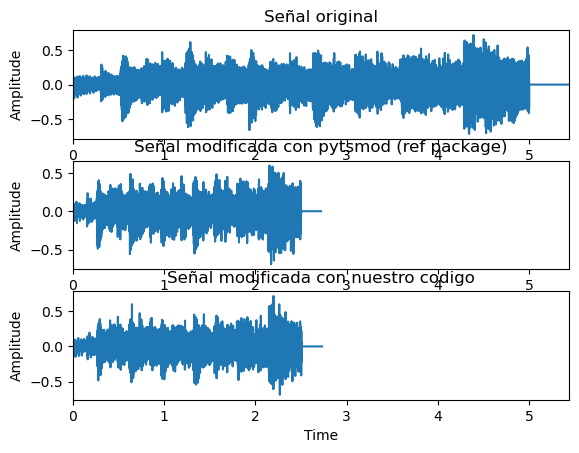

In [144]:
#Grafiquemos

plotting.basic_3plot(piano_cerca,pianocerca_refe,pianocerca_ours,48000)


##### OBSERVACIONES:

En terminos generales, funciona de manera similar en comparacion con la libreria propuesta de referencia.

Se puede notar la distorsion causada por el proceso de TSM OLA en esta señal armonica, como fue detallado en la bibliografia.

Para N = 1024 o 512 da optimos resultados, lo que se condice con los papers. Si disminuimos mucho el tamaño de la ventana modifica bastante el pitch, y si lo aumentamos da muchas modulaciones en amplitud.

#### CASO 2:

Audio: 'techno_perc.wav' estereo (lo convertimos a dual mono), 44.1k, 8 seg (percusivo).

Probamos variando el alpha, el N de la ventana y manteniendo un Hs=N//2

In [153]:
#lectura de audio
fs = 44100
perc, _ = read_wav('audios/techno_perc.wav', fs)

#pytsmod version
perc_tsmrefe= olatsm.ola(perc, 1.2, win_type='hann', win_size=512, syn_hop_size=512//2)

#nuestra version
perc_tsm_untref = ola.TSM_OLA(perc, 512, 1.2, 512//2)

In [154]:
#Escucho señal modificada by pystmod
Audio(perc_tsmrefe, rate=48000)

In [155]:
#Escucho señal modificada por nuestro code
Audio(perc_tsm_untref, rate=48000)

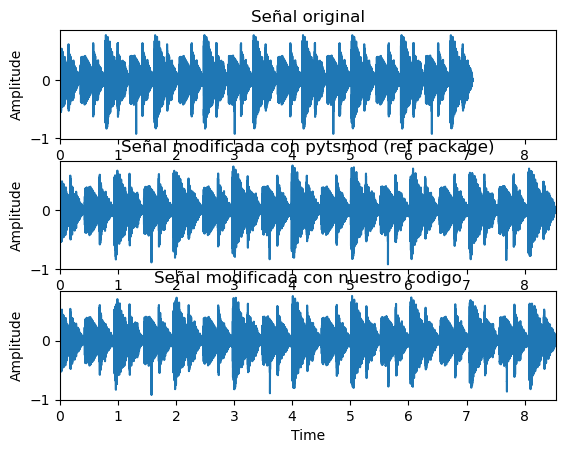

In [156]:
#Grafiquemos

plotting.basic_3plot(perc,perc_tsmrefe,perc_tsm_untref,48000)

##### OBSERVACIONES:

Como en el caso 1, funciona de manera similar en comparacion con la libreria propuesta de referencia.

Se puede notar una mejor percepcion sonora en cuanto al TSM aplicado, para valores de alfa no muy extremos, comprendidos entre 0.6 y 1.5 aproximadamente. A medida que la modificacion de escala se vuelve mas extrema, se comienza a notar mas pero igual perceptualmente no pareceria grave, dada la simplicidad del algoritmo. Hay que evaluar hasta que limites de alpha tiene sentido en la aplicacion.

Para N = 1024 o 512 da buenos resultados, lo que se condice con los papers. 
Si aumentamos mucho el tamaño de la ventana comienza a hacerse notorio el artefacto de 'transient doubling' descripto en la bibliografia.
Si reducimos el tamaño de la ventana por debajo de 512, lo que seria menor a 10ms para fs de 44100 o 48000, en la version de referencia funciona y pareceria reducir el cambio de pitch. En nuestro codigo, no compila y tira error de dimensiones al efectuar el tsm. (habria que revisar)

Pero en terminos generales, se puede efectuar para valores de ventanas de N=512 y N=1024.

A continuacion, podemos proceder a realizar PRUEBAS OBJETIVAS sobre el rendimiento del algoritmo, en comparacion con señales simples ideales, y sus modificaciones de duracion ideales, sin ninguna variacion de pitch.